In [1]:
#importing

import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn import linear_model,metrics

In [2]:
#reading the data set
sd = pd.read_csv("PUBG_Player_Statistics.csv", encoding= 'unicode_escape')

In [3]:
sd

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87893,SaikoMene,87710,1.05,0.00,48273.92,62,0,0.00,5,8.1,...,105321.37,211421.17,1863.11,1503.24,489.84,136,15,70,7285.37,41
87894,KARUKOR,22783,1.61,4.65,49006.75,43,2,0.22,9,20.9,...,98108.14,242154.75,1636.41,1590.67,235.24,143,26,72,14440.64,97
87895,Dertydann,178547,1.00,0.00,14272.20,16,0,0.00,1,6.2,...,177062.72,384254.27,2109.40,1088.12,453.87,157,24,95,15939.11,92
87896,Neferhor,126589,5.10,16.67,58518.86,48,8,0.44,18,37.5,...,523052.83,853232.16,1785.15,1804.51,449.91,397,39,317,56870.07,350


In [4]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87898 entries, 0 to 87897
Columns: 152 entries, player_name to squad_DBNOs
dtypes: float64(83), int64(68), object(1)
memory usage: 101.9+ MB


In [5]:
sd.describe()

,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
count,87898.000000,87898.000000,87898.000000,8.789800e+04,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,...,8.789800e+04,8.789800e+04,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000
mean,110794.357050,1.865855,5.017506,6.971571e+04,79.275342,2.080093,0.179251,12.106282,20.667335,77.195249,...,3.163813e+05,5.968687e+05,1630.826705,1772.866887,381.417868,345.853148,39.403160,226.072345,30960.026736,201.564017
std,63648.581759,1.776301,10.077138,8.040861e+04,96.947859,3.394513,0.217444,14.694722,16.181078,95.545156,...,2.895132e+05,4.910160e+05,433.957257,803.932786,182.995324,300.328618,33.500954,204.961191,27498.941894,181.558141
min,0.000000,0.000000,0.000000,7.610000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51925.250000,1.030000,0.000000,1.789705e+04,17.000000,0.000000,0.000000,4.000000,10.800000,16.000000,...,1.266086e+05,2.661650e+05,1377.460000,1226.412500,282.830000,144.000000,17.000000,91.000000,12827.937500,82.000000
50%,112705.500000,1.470000,2.000000,4.517333e+04,48.000000,1.000000,0.110000,8.000000,16.700000,46.000000,...,2.380680e+05,4.743565e+05,1592.410000,1645.455000,354.405000,266.000000,31.000000,169.000000,23608.320000,153.000000
75%,164879.750000,2.140000,5.560000,9.246264e+04,105.000000,3.000000,0.250000,15.000000,25.900000,102.000000,...,4.116721e+05,7.820437e+05,1847.200000,2177.837500,443.567500,456.000000,52.000000,295.000000,40426.240000,263.000000
max,222490.000000,100.000000,100.000000,1.521200e+06,1681.000000,106.000000,1.000000,386.000000,100.000000,1673.000000,...,4.323045e+06,6.057798e+06,47314.750000,9632.720000,4604.990000,4394.000000,417.000000,2769.000000,484492.810000,3334.000000


In [6]:
#getting the column names required
sd.columns

Index(['player_name', 'tracker_id', 'solo_KillDeathRatio', 'solo_WinRatio',
       'solo_TimeSurvived', 'solo_RoundsPlayed', 'solo_Wins',
       'solo_WinTop10Ratio', 'solo_Top10s', 'solo_Top10Ratio',
       ...
       'squad_RideDistance', 'squad_MoveDistance', 'squad_AvgWalkDistance',
       'squad_AvgRideDistance', 'squad_LongestKill', 'squad_Heals',
       'squad_Revives', 'squad_Boosts', 'squad_DamageDealt', 'squad_DBNOs'],
      dtype='object', length=152)

In [7]:
#filtering the data.
sf = sd.filter(['player_name','solo_KillDeathRatio', 'solo_WinRatio','solo_AvgSurvivalTime','solo_MoveDistance','solo_DamageDealt', 'duo_KillDeathRatio', 'duo_WinRatio', 'duo_AvgSurvivalTime', 'duo_MoveDistance', 'duo_DamageDealt','squad_KillDeathRatio', 'squad_WinRatio', 'squad_AvgSurvivalTime', 'squad_MoveDistance', 'squad_DamageDealt'])

In [8]:
sf

,player_name,solo_KillDeathRatio,solo_WinRatio,solo_AvgSurvivalTime,solo_MoveDistance,solo_DamageDealt,duo_KillDeathRatio,duo_WinRatio,duo_AvgSurvivalTime,duo_MoveDistance,duo_DamageDealt,squad_KillDeathRatio,squad_WinRatio,squad_AvgSurvivalTime,squad_MoveDistance,squad_DamageDealt
0,BreakNeck,3.14,17.65,1262.83,56461.84,4341.06,6.50,33.33,1194.21,95809.08,8544.07,5.45,47.51,1449.03,5194786.58,242132.73
1,Blackwalk,4.41,18.18,1221.32,165706.51,12970.39,4.56,35.71,1020.42,96162.39,4744.32,5.73,46.81,1570.51,6051783.67,269795.75
2,mercedes_benz,3.60,0.00,1133.17,14023.99,1648.82,6.55,35.29,1369.22,99274.93,8972.61,6.08,47.34,1223.28,5589608.74,292977.07
3,DORA,14.00,50.00,1677.73,47894.53,6015.57,8.00,66.67,1398.79,18618.21,1302.40,4.77,42.16,1583.73,3796916.00,181106.90
4,n2tstar,10.50,33.33,1640.17,39161.77,3824.89,5.03,25.71,1357.82,594555.10,45005.56,5.70,46.39,1608.96,3220260.00,160029.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87893,SaikoMene,1.05,0.00,785.41,115301.13,7627.69,1.00,7.14,869.71,77683.86,3112.14,0.94,3.57,1074.56,211421.17,7285.37
87894,KARUKOR,1.61,4.65,1139.69,99154.98,7442.31,1.55,0.00,1256.53,63961.67,5436.55,1.42,8.70,1050.24,242154.75,14440.64
87895,Dertydann,1.00,0.00,892.01,40683.07,1944.62,1.01,2.54,944.31,312451.29,16135.20,0.90,1.46,1121.51,384254.27,15939.11
87896,Neferhor,5.10,16.67,1165.62,190774.76,23610.79,3.88,17.74,993.52,1140460.16,100159.51,2.88,15.95,1312.41,853232.16,56870.07


In [9]:
sf.describe()

,solo_KillDeathRatio,solo_WinRatio,solo_AvgSurvivalTime,solo_MoveDistance,solo_DamageDealt,duo_KillDeathRatio,duo_WinRatio,duo_AvgSurvivalTime,duo_MoveDistance,duo_DamageDealt,squad_KillDeathRatio,squad_WinRatio,squad_AvgSurvivalTime,squad_MoveDistance,squad_DamageDealt
count,87898.000000,87898.000000,87898.000000,8.789800e+04,87898.000000,87898.000000,87898.000000,87898.000000,8.789800e+04,87898.000000,87898.000000,87898.000000,87898.000000,8.789800e+04,87898.000000
mean,1.865855,5.017506,996.532801,2.058714e+05,12664.088827,1.467401,4.642894,996.295375,3.320947e+05,19056.005310,1.401922,6.301490,1041.520426,5.968687e+05,30960.026736
std,1.776301,10.077138,269.595503,2.607638e+05,15596.418056,1.350836,5.802484,202.597589,2.670588e+05,16870.020813,1.049396,5.579105,188.952385,4.910160e+05,27498.941894
min,0.000000,0.000000,76.100000,0.000000e+00,0.000000,0.000000,0.000000,106.880000,0.000000e+00,0.000000,0.000000,0.000000,102.290000,0.000000e+00,0.000000
25%,1.030000,0.000000,816.982500,4.875226e+04,3495.237500,0.920000,1.500000,862.870000,1.466108e+05,7729.120000,0.880000,3.090000,921.592500,2.661650e+05,12827.937500
50%,1.470000,2.000000,971.220000,1.265084e+05,8387.940000,1.260000,3.230000,980.600000,2.699128e+05,14706.380000,1.220000,4.980000,1031.305000,4.743565e+05,23608.320000
75%,2.140000,5.560000,1153.647500,2.663913e+05,16186.897500,1.730000,5.880000,1117.407500,4.441681e+05,25305.085000,1.680000,7.810000,1155.477500,7.820437e+05,40426.240000
max,100.000000,100.000000,2196.840000,6.480220e+06,598378.320000,86.000000,100.000000,2074.660000,3.761944e+06,265372.410000,82.000000,100.000000,2029.280000,6.057798e+06,484492.810000


In [10]:
sf.dtypes

player_name               object
solo_KillDeathRatio      float64
solo_WinRatio            float64
solo_AvgSurvivalTime     float64
solo_MoveDistance        float64
solo_DamageDealt         float64
duo_KillDeathRatio       float64
duo_WinRatio             float64
duo_AvgSurvivalTime      float64
duo_MoveDistance         float64
duo_DamageDealt          float64
squad_KillDeathRatio     float64
squad_WinRatio           float64
squad_AvgSurvivalTime    float64
squad_MoveDistance       float64
squad_DamageDealt        float64
dtype: object

In [11]:
#checking for Null Values
sf.isnull().sum()

player_name              0
solo_KillDeathRatio      0
solo_WinRatio            0
solo_AvgSurvivalTime     0
solo_MoveDistance        0
solo_DamageDealt         0
duo_KillDeathRatio       0
duo_WinRatio             0
duo_AvgSurvivalTime      0
duo_MoveDistance         0
duo_DamageDealt          0
squad_KillDeathRatio     0
squad_WinRatio           0
squad_AvgSurvivalTime    0
squad_MoveDistance       0
squad_DamageDealt        0
dtype: int64

In [12]:
#droping Duplicates
sf.drop_duplicates()

,player_name,solo_KillDeathRatio,solo_WinRatio,solo_AvgSurvivalTime,solo_MoveDistance,solo_DamageDealt,duo_KillDeathRatio,duo_WinRatio,duo_AvgSurvivalTime,duo_MoveDistance,duo_DamageDealt,squad_KillDeathRatio,squad_WinRatio,squad_AvgSurvivalTime,squad_MoveDistance,squad_DamageDealt
0,BreakNeck,3.14,17.65,1262.83,56461.84,4341.06,6.50,33.33,1194.21,95809.08,8544.07,5.45,47.51,1449.03,5194786.58,242132.73
1,Blackwalk,4.41,18.18,1221.32,165706.51,12970.39,4.56,35.71,1020.42,96162.39,4744.32,5.73,46.81,1570.51,6051783.67,269795.75
2,mercedes_benz,3.60,0.00,1133.17,14023.99,1648.82,6.55,35.29,1369.22,99274.93,8972.61,6.08,47.34,1223.28,5589608.74,292977.07
3,DORA,14.00,50.00,1677.73,47894.53,6015.57,8.00,66.67,1398.79,18618.21,1302.40,4.77,42.16,1583.73,3796916.00,181106.90
4,n2tstar,10.50,33.33,1640.17,39161.77,3824.89,5.03,25.71,1357.82,594555.10,45005.56,5.70,46.39,1608.96,3220260.00,160029.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87893,SaikoMene,1.05,0.00,785.41,115301.13,7627.69,1.00,7.14,869.71,77683.86,3112.14,0.94,3.57,1074.56,211421.17,7285.37
87894,KARUKOR,1.61,4.65,1139.69,99154.98,7442.31,1.55,0.00,1256.53,63961.67,5436.55,1.42,8.70,1050.24,242154.75,14440.64
87895,Dertydann,1.00,0.00,892.01,40683.07,1944.62,1.01,2.54,944.31,312451.29,16135.20,0.90,1.46,1121.51,384254.27,15939.11
87896,Neferhor,5.10,16.67,1165.62,190774.76,23610.79,3.88,17.74,993.52,1140460.16,100159.51,2.88,15.95,1312.41,853232.16,56870.07


In [13]:
#replace
sf = sf.replace({'':0})

In [14]:
sf

,player_name,solo_KillDeathRatio,solo_WinRatio,solo_AvgSurvivalTime,solo_MoveDistance,solo_DamageDealt,duo_KillDeathRatio,duo_WinRatio,duo_AvgSurvivalTime,duo_MoveDistance,duo_DamageDealt,squad_KillDeathRatio,squad_WinRatio,squad_AvgSurvivalTime,squad_MoveDistance,squad_DamageDealt
0,BreakNeck,3.14,17.65,1262.83,56461.84,4341.06,6.50,33.33,1194.21,95809.08,8544.07,5.45,47.51,1449.03,5194786.58,242132.73
1,Blackwalk,4.41,18.18,1221.32,165706.51,12970.39,4.56,35.71,1020.42,96162.39,4744.32,5.73,46.81,1570.51,6051783.67,269795.75
2,mercedes_benz,3.60,0.00,1133.17,14023.99,1648.82,6.55,35.29,1369.22,99274.93,8972.61,6.08,47.34,1223.28,5589608.74,292977.07
3,DORA,14.00,50.00,1677.73,47894.53,6015.57,8.00,66.67,1398.79,18618.21,1302.40,4.77,42.16,1583.73,3796916.00,181106.90
4,n2tstar,10.50,33.33,1640.17,39161.77,3824.89,5.03,25.71,1357.82,594555.10,45005.56,5.70,46.39,1608.96,3220260.00,160029.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87893,SaikoMene,1.05,0.00,785.41,115301.13,7627.69,1.00,7.14,869.71,77683.86,3112.14,0.94,3.57,1074.56,211421.17,7285.37
87894,KARUKOR,1.61,4.65,1139.69,99154.98,7442.31,1.55,0.00,1256.53,63961.67,5436.55,1.42,8.70,1050.24,242154.75,14440.64
87895,Dertydann,1.00,0.00,892.01,40683.07,1944.62,1.01,2.54,944.31,312451.29,16135.20,0.90,1.46,1121.51,384254.27,15939.11
87896,Neferhor,5.10,16.67,1165.62,190774.76,23610.79,3.88,17.74,993.52,1140460.16,100159.51,2.88,15.95,1312.41,853232.16,56870.07


# creating Scatter Plot Matrix to define the relation between data for Solo, Duo and Squad

# Solo

<ipython-input-15-a12e2b9aba80>:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scatter_matrix(sf[plot_cols], diagonal='hist', ax = ax)


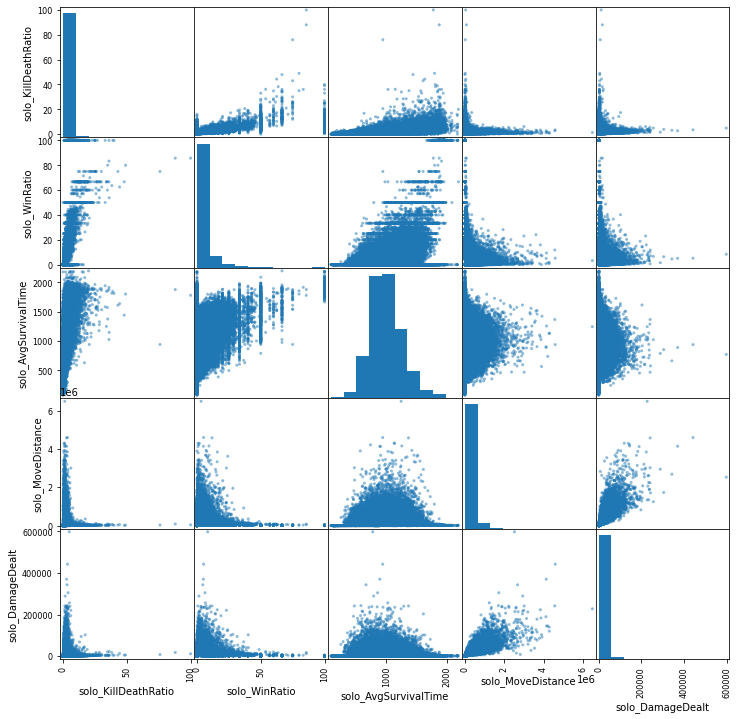

'Done'

In [15]:


from pandas.plotting import scatter_matrix

plot_cols = ["solo_KillDeathRatio",
              "solo_WinRatio",
              "solo_AvgSurvivalTime",
              "solo_MoveDistance",
              "solo_DamageDealt"]

## Create a scatter plot matric --- a pair-wise scatter plots         
def auto_pairs(plot_cols, sf):
    fig = plt.figure(1, figsize=(12, 12))
    fig.clf()
    ax = fig.gca()
    scatter_matrix(sf[plot_cols], diagonal='hist', ax = ax)
    plt.show()
    return('Done')
auto_pairs(plot_cols, sf)

# Duo

<ipython-input-16-b9db5efa0a49>:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scatter_matrix(sf[plot_cols], diagonal='hist', ax = ax)


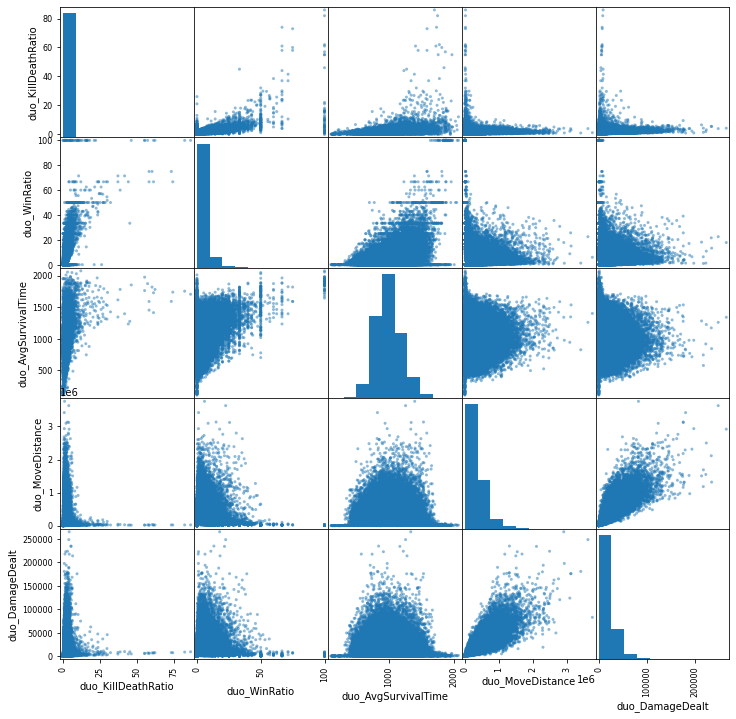

'Done'

In [16]:


from pandas.plotting import scatter_matrix

plot_cols = ["duo_KillDeathRatio",
              "duo_WinRatio",
              "duo_AvgSurvivalTime",
              "duo_MoveDistance",
              "duo_DamageDealt"]

## Create a scatter plot matric --- a pair-wise scatter plots         
def auto_pairs(plot_cols, sf):
    fig = plt.figure(1, figsize=(12, 12))
    fig.clf()
    ax = fig.gca()
    scatter_matrix(sf[plot_cols], diagonal='hist', ax = ax)
    plt.show()
    return('Done')
auto_pairs(plot_cols, sf)

# Squad

<ipython-input-17-cc55578a594d>:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scatter_matrix(sf[plot_cols], diagonal='hist', ax = ax)


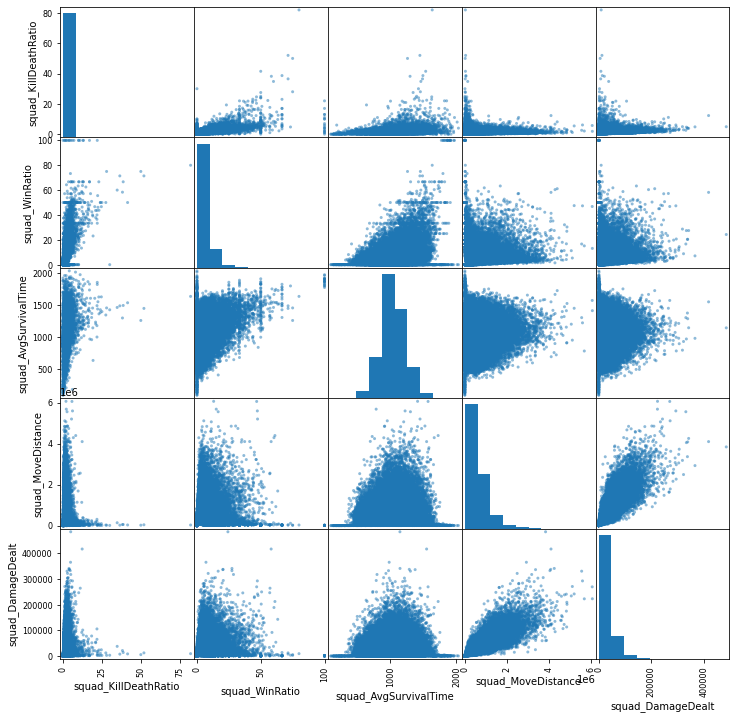

'Done'

In [17]:
from pandas.plotting import scatter_matrix

plot_cols = ["squad_KillDeathRatio",
              "squad_WinRatio",
              "squad_AvgSurvivalTime",
              "squad_MoveDistance",
              "squad_DamageDealt"]

## Create a scatter plot matric --- a pair-wise scatter plots         
def auto_pairs(plot_cols, sf):
    fig = plt.figure(1, figsize=(12, 12))
    fig.clf()
    ax = fig.gca()
    scatter_matrix(sf[plot_cols], diagonal='hist', ax = ax)
    plt.show()
    return('Done')
auto_pairs(plot_cols, sf)

# Comparing Win Ratio and Death Ratio for Solo Gameplay

In [18]:
#Getting the Required Columns
Solo = sf.filter(['solo_KillDeathRatio','solo_WinRatio'])

In [19]:
#Getting win ratio <20
Solo = Solo.loc[Solo['solo_WinRatio'] < 20]

In [20]:
Solo

,solo_KillDeathRatio,solo_WinRatio
0,3.14,17.65
1,4.41,18.18
2,3.60,0.00
6,2.45,8.45
8,3.68,13.64
...,...,...
87893,1.05,0.00
87894,1.61,4.65
87895,1.00,0.00
87896,5.10,16.67


In [21]:
#diving the win ratio into buckets
Solo['Solo_WinRatio_Buckets'] = pd.cut(x=Solo['solo_WinRatio'],  bins=[0, 5.0, 10.0, 15.0, 20.0], labels=['<5','5 to 10','10 to 15','15 to 20'])

In [22]:
Solo

,solo_KillDeathRatio,solo_WinRatio,Solo_WinRatio_Buckets
0,3.14,17.65,15 to 20
1,4.41,18.18,15 to 20
2,3.60,0.00,NaN
6,2.45,8.45,5 to 10
8,3.68,13.64,10 to 15
...,...,...,...
87893,1.05,0.00,NaN
87894,1.61,4.65,<5
87895,1.00,0.00,NaN
87896,5.10,16.67,15 to 20


In [23]:
#dropping NaN Values
Solo.dropna()

,solo_KillDeathRatio,solo_WinRatio,Solo_WinRatio_Buckets
0,3.14,17.65,15 to 20
1,4.41,18.18,15 to 20
6,2.45,8.45,5 to 10
8,3.68,13.64,10 to 15
10,3.12,6.03,5 to 10
...,...,...,...
87889,2.00,3.85,<5
87891,1.63,6.90,5 to 10
87894,1.61,4.65,<5
87896,5.10,16.67,15 to 20


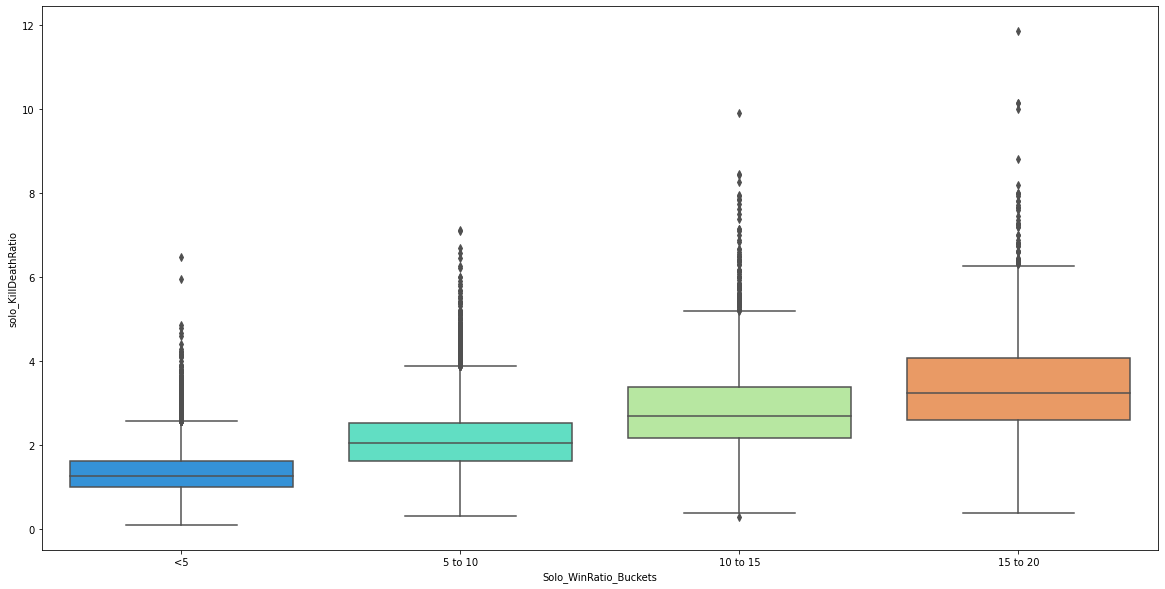

In [24]:
#Using Season Born to plot and show to relation between Solo Kill Death Ratio and Solo Win Ratio
import seaborn as sns
fig_dims = (20,10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(x = "Solo_WinRatio_Buckets", y = "solo_KillDeathRatio", data=Solo, palette = 'rainbow')
plt.show() 

# Comparing Win Ratio and Death Ratio for Duo gameplay

In [25]:
#Getting the Required Columns
Duo = sf.filter(['duo_KillDeathRatio','duo_WinRatio'])

In [26]:
#Getting win ratio <20
Duo = Duo.loc[Duo['duo_WinRatio'] < 20]

In [27]:
Duo

,duo_KillDeathRatio,duo_WinRatio
5,2.94,14.67
7,2.82,18.52
8,3.16,13.64
9,4.00,17.65
10,3.79,11.46
...,...,...
87893,1.00,7.14
87894,1.55,0.00
87895,1.01,2.54
87896,3.88,17.74


In [28]:
#diving the win ratio into buckets
Duo['Duo_WinRatio_Buckets'] = pd.cut(x=Duo['duo_WinRatio'], bins=[0, 5.0, 10.0, 15.0, 20.0], labels=['<5','5 to 10','10 to 15','15 t0 20'])

In [29]:
Duo

,duo_KillDeathRatio,duo_WinRatio,Duo_WinRatio_Buckets
5,2.94,14.67,10 to 15
7,2.82,18.52,15 t0 20
8,3.16,13.64,10 to 15
9,4.00,17.65,15 t0 20
10,3.79,11.46,10 to 15
...,...,...,...
87893,1.00,7.14,5 to 10
87894,1.55,0.00,NaN
87895,1.01,2.54,<5
87896,3.88,17.74,15 t0 20


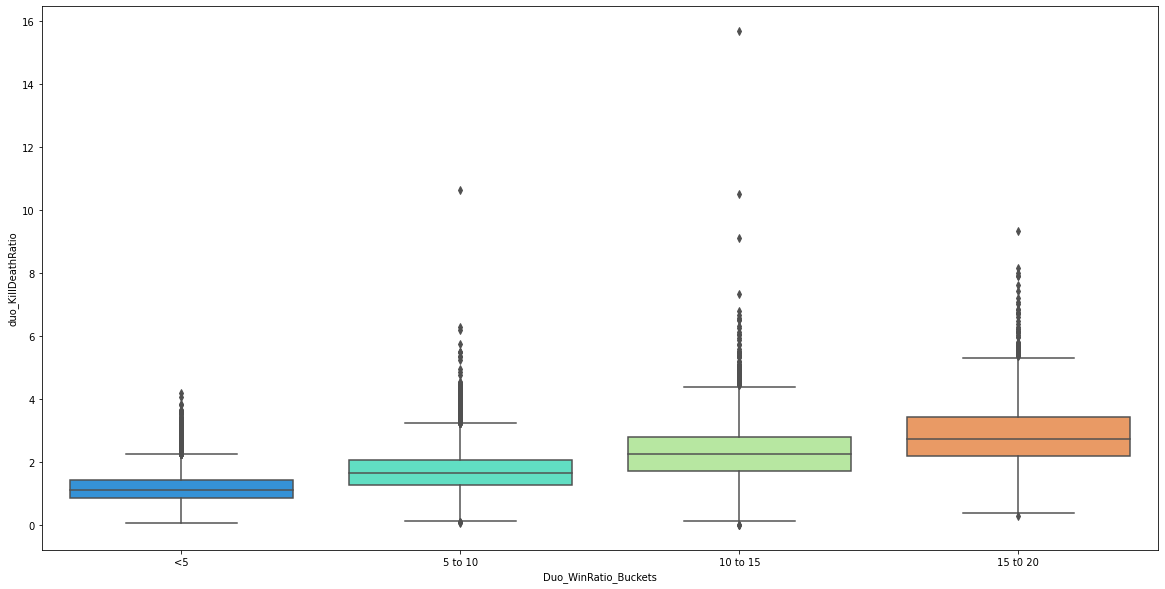

In [30]:
#Using Season Born to plot and show to relation between Duo Kill Death Ratio and Duo Win Ratio
import seaborn as sns
fig_dims = (20,10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(x = "Duo_WinRatio_Buckets", y = "duo_KillDeathRatio", data=Duo, palette = 'rainbow')
plt.show() 

# Comparing Win Ratio and Death Ratio for Squad Gameplay

In [31]:
#Getting the Required Columns
Squad = sf.filter(['squad_KillDeathRatio','squad_WinRatio'])

In [32]:
#Getting win ratio <20
Squad = Squad.loc[Squad['squad_WinRatio'] < 20]

In [33]:
Squad

,squad_KillDeathRatio,squad_WinRatio
11,1.64,18.50
19,2.39,17.91
20,2.70,18.56
21,2.18,10.72
22,1.74,16.60
...,...,...
87893,0.94,3.57
87894,1.42,8.70
87895,0.90,1.46
87896,2.88,15.95


In [34]:
#diving the win ratio into buckets
Squad['Squad_WinRatio_Buckets'] = pd.cut(x=Squad['squad_WinRatio'], bins=[0, 5.0, 10.0, 15.0, 20.0], labels=['<5','5 to 10','10 to 15','15 to 20'])

In [35]:
Squad

,squad_KillDeathRatio,squad_WinRatio,Squad_WinRatio_Buckets
11,1.64,18.50,15 to 20
19,2.39,17.91,15 to 20
20,2.70,18.56,15 to 20
21,2.18,10.72,10 to 15
22,1.74,16.60,15 to 20
...,...,...,...
87893,0.94,3.57,<5
87894,1.42,8.70,5 to 10
87895,0.90,1.46,<5
87896,2.88,15.95,15 to 20


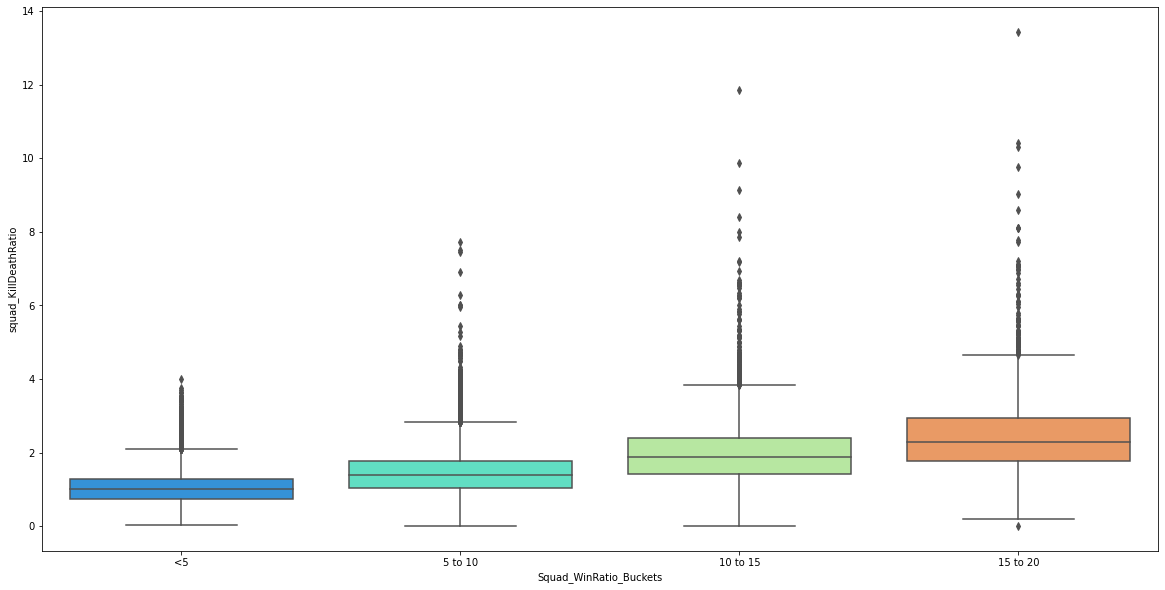

In [36]:
#Using Season Born to plot and show to relation between squad Kill Death Ratio and sqaud Win Ratio
import seaborn as sns
fig_dims = (20,10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(x = "Squad_WinRatio_Buckets", y = "squad_KillDeathRatio", data=Squad, palette = 'rainbow')
plt.show()

# Grouping

In [37]:
#using this columns to determine the level of the player in the game
WinRatioDataset = sd.filter(['solo_WinRatio','duo_WinRatio','squad_WinRatio'])

In [38]:
WinRatioDataset

,solo_WinRatio,duo_WinRatio,squad_WinRatio
0,17.65,33.33,47.51
1,18.18,35.71,46.81
2,0.00,35.29,47.34
3,50.00,66.67,42.16
4,33.33,25.71,46.39
...,...,...,...
87893,0.00,7.14,3.57
87894,4.65,0.00,8.70
87895,0.00,2.54,1.46
87896,16.67,17.74,15.95


In [39]:
#Categorizing the level of players using the Win Ratio
WinRatioDataset['Solo_Categories'] = ['Beginner' if x < 5 else 
                        ('Amateur' if 5<=x<10 else
                         ('Intermediate' if 10<=x<15 else
                          ('Pro'if 16<=x<20 else 'Legend'))) for x in WinRatioDataset['solo_WinRatio']]   

In [40]:
WinRatioDataset

,solo_WinRatio,duo_WinRatio,squad_WinRatio,Solo_Categories
0,17.65,33.33,47.51,Pro
1,18.18,35.71,46.81,Pro
2,0.00,35.29,47.34,Beginner
3,50.00,66.67,42.16,Legend
4,33.33,25.71,46.39,Legend
...,...,...,...,...
87893,0.00,7.14,3.57,Beginner
87894,4.65,0.00,8.70,Beginner
87895,0.00,2.54,1.46,Beginner
87896,16.67,17.74,15.95,Pro


In [41]:
WinRatioDataset['Solo_Categories']

0             Pro
1             Pro
2        Beginner
3          Legend
4          Legend
           ...   
87893    Beginner
87894    Beginner
87895    Beginner
87896         Pro
87897    Beginner
Name: Solo_Categories, Length: 87898, dtype: object

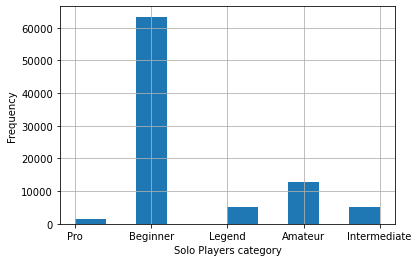

In [42]:
#Plot to show to number of players in each level
plt.hist(WinRatioDataset['Solo_Categories'])
plt.xlabel('Solo Players category')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [43]:
#Categorizing the level of players using the Win Ratio
WinRatioDataset['Duo_Categories'] = ['Beginner' if x < 5 else 
                        ('Amateur' if 5<=x<10 else
                         ('Intermediate' if 10<=x<15 else
                          ('Pro'if 16<=x<20 else 'Legend'))) for x in WinRatioDataset['duo_WinRatio']]   


In [44]:
WinRatioDataset

,solo_WinRatio,duo_WinRatio,squad_WinRatio,Solo_Categories,Duo_Categories
0,17.65,33.33,47.51,Pro,Legend
1,18.18,35.71,46.81,Pro,Legend
2,0.00,35.29,47.34,Beginner,Legend
3,50.00,66.67,42.16,Legend,Legend
4,33.33,25.71,46.39,Legend,Legend
...,...,...,...,...,...
87893,0.00,7.14,3.57,Beginner,Amateur
87894,4.65,0.00,8.70,Beginner,Beginner
87895,0.00,2.54,1.46,Beginner,Beginner
87896,16.67,17.74,15.95,Pro,Pro


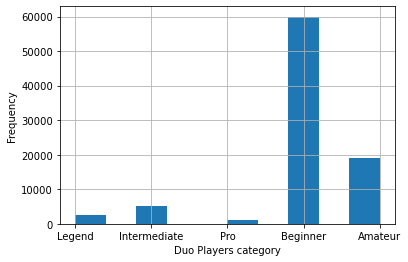

In [45]:
#Plot to show to number of players in each level
plt.hist(WinRatioDataset['Duo_Categories'])
plt.xlabel('Duo Players category')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [46]:
#Categorizing the level of players using the Win Ratio
WinRatioDataset['Squad_Categories'] = ['Beginner' if x < 5 else 
                        ('Amateur' if 5<=x<10 else
                         ('Intermediate' if 10<=x<15 else
                          ('Pro'if 16<=x<20 else 'Legend'))) for x in WinRatioDataset['squad_WinRatio']]   

In [47]:
WinRatioDataset

,solo_WinRatio,duo_WinRatio,squad_WinRatio,Solo_Categories,Duo_Categories,Squad_Categories
0,17.65,33.33,47.51,Pro,Legend,Legend
1,18.18,35.71,46.81,Pro,Legend,Legend
2,0.00,35.29,47.34,Beginner,Legend,Legend
3,50.00,66.67,42.16,Legend,Legend,Legend
4,33.33,25.71,46.39,Legend,Legend,Legend
...,...,...,...,...,...,...
87893,0.00,7.14,3.57,Beginner,Amateur,Beginner
87894,4.65,0.00,8.70,Beginner,Beginner,Amateur
87895,0.00,2.54,1.46,Beginner,Beginner,Beginner
87896,16.67,17.74,15.95,Pro,Pro,Legend


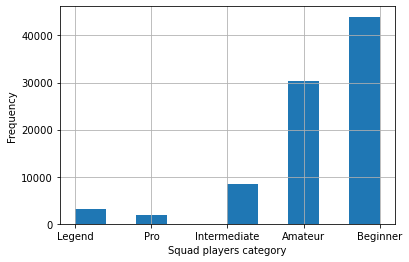

In [48]:
#Plot to show to number of players in each level
plt.hist(WinRatioDataset['Squad_Categories'])
plt.xlabel('Squad players category')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [49]:
WinRatioDataset['Squad_Categories'].value_counts()

Beginner        43976
Amateur         30415
Intermediate     8470
Legend           3160
Pro              1877
Name: Squad_Categories, dtype: int64

In [50]:
WinRatioDataset['Duo_Categories'].value_counts()

Beginner        59952
Amateur         19090
Intermediate     5280
Legend           2409
Pro              1167
Name: Duo_Categories, dtype: int64

In [51]:
WinRatioDataset['Solo_Categories'].value_counts()

Beginner        63392
Amateur         12766
Intermediate     5202
Legend           5001
Pro              1537
Name: Solo_Categories, dtype: int64

In [52]:
#winGroup=winGroup['Players_count']
winGroup=WinRatioDataset.groupby(['Solo_Categories', 'Duo_Categories','Squad_Categories']).count().reset_index()

In [53]:
winGroup

,Solo_Categories,Duo_Categories,Squad_Categories,solo_WinRatio,duo_WinRatio,squad_WinRatio
0,Amateur,Amateur,Amateur,2084,2084,2084
1,Amateur,Amateur,Beginner,898,898,898
2,Amateur,Amateur,Intermediate,812,812,812
3,Amateur,Amateur,Legend,201,201,201
4,Amateur,Amateur,Pro,138,138,138
...,...,...,...,...,...,...
120,Pro,Pro,Amateur,13,13,13
121,Pro,Pro,Beginner,7,7,7
122,Pro,Pro,Intermediate,22,22,22
123,Pro,Pro,Legend,22,22,22


In [54]:
#adding the count obtained to calculate the overall players count based on their level
winGroup["Players_count"] = winGroup['solo_WinRatio'] + winGroup['duo_WinRatio'] + winGroup['squad_WinRatio']

In [55]:
winGroup

,Solo_Categories,Duo_Categories,Squad_Categories,solo_WinRatio,duo_WinRatio,squad_WinRatio,Players_count
0,Amateur,Amateur,Amateur,2084,2084,2084,6252
1,Amateur,Amateur,Beginner,898,898,898,2694
2,Amateur,Amateur,Intermediate,812,812,812,2436
3,Amateur,Amateur,Legend,201,201,201,603
4,Amateur,Amateur,Pro,138,138,138,414
...,...,...,...,...,...,...,...
120,Pro,Pro,Amateur,13,13,13,39
121,Pro,Pro,Beginner,7,7,7,21
122,Pro,Pro,Intermediate,22,22,22,66
123,Pro,Pro,Legend,22,22,22,66


In [56]:
winGroup.describe()

,solo_WinRatio,duo_WinRatio,squad_WinRatio,Players_count
count,125.000000,125.000000,125.000000,125.000000
mean,703.184000,703.184000,703.184000,2109.552000
std,3138.489819,3138.489819,3138.489819,9415.469457
min,7.000000,7.000000,7.000000,21.000000
25%,48.000000,48.000000,48.000000,144.000000
50%,94.000000,94.000000,94.000000,282.000000
75%,285.000000,285.000000,285.000000,855.000000
max,31788.000000,31788.000000,31788.000000,95364.000000


In [57]:
winGroup

,Solo_Categories,Duo_Categories,Squad_Categories,solo_WinRatio,duo_WinRatio,squad_WinRatio,Players_count
0,Amateur,Amateur,Amateur,2084,2084,2084,6252
1,Amateur,Amateur,Beginner,898,898,898,2694
2,Amateur,Amateur,Intermediate,812,812,812,2436
3,Amateur,Amateur,Legend,201,201,201,603
4,Amateur,Amateur,Pro,138,138,138,414
...,...,...,...,...,...,...,...
120,Pro,Pro,Amateur,13,13,13,39
121,Pro,Pro,Beginner,7,7,7,21
122,Pro,Pro,Intermediate,22,22,22,66
123,Pro,Pro,Legend,22,22,22,66


In [58]:
winGroup = winGroup.drop(['solo_WinRatio','duo_WinRatio','squad_WinRatio'],axis=1)

In [59]:
#end result - Here you can see the number of players and their count for each level in different game types.
winGroup

,Solo_Categories,Duo_Categories,Squad_Categories,Players_count
0,Amateur,Amateur,Amateur,6252
1,Amateur,Amateur,Beginner,2694
2,Amateur,Amateur,Intermediate,2436
3,Amateur,Amateur,Legend,603
4,Amateur,Amateur,Pro,414
...,...,...,...,...
120,Pro,Pro,Amateur,39
121,Pro,Pro,Beginner,21
122,Pro,Pro,Intermediate,66
123,Pro,Pro,Legend,66


# Comparing Win ratio with Time survived in the game

# Solo Win ratio and Time Survived

In [60]:
#getting the required columns
Solo_TW = sf.filter(['solo_WinRatio','solo_AvgSurvivalTime','solo_KillDeathRatio'])

In [61]:
Solo_TW

,solo_WinRatio,solo_AvgSurvivalTime,solo_KillDeathRatio
0,17.65,1262.83,3.14
1,18.18,1221.32,4.41
2,0.00,1133.17,3.60
3,50.00,1677.73,14.00
4,33.33,1640.17,10.50
...,...,...,...
87893,0.00,785.41,1.05
87894,4.65,1139.69,1.61
87895,0.00,892.01,1.00
87896,16.67,1165.62,5.10


In [62]:
#considering win ratio < 20
Solo_TimeandWin = Solo_TW.loc[Solo_TW['solo_WinRatio'] < 20]

In [63]:
Solo_TimeandWin

,solo_WinRatio,solo_AvgSurvivalTime,solo_KillDeathRatio
0,17.65,1262.83,3.14
1,18.18,1221.32,4.41
2,0.00,1133.17,3.60
6,8.45,1238.78,2.45
8,13.64,651.93,3.68
...,...,...,...
87893,0.00,785.41,1.05
87894,4.65,1139.69,1.61
87895,0.00,892.01,1.00
87896,16.67,1165.62,5.10


In [64]:
#diving the win ratio into buket
Solo_TimeandWin['Solo_WinRatio_Bucket'] = pd.cut(x=Solo_TimeandWin['solo_WinRatio'],  bins=[0, 5.0, 10.0, 15.0, 20.0], labels=['<5','5 to 10','10 to 15','15 to 20'])

<ipython-input-64-f9088338e562>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Solo_TimeandWin['Solo_WinRatio_Bucket'] = pd.cut(x=Solo_TimeandWin['solo_WinRatio'],  bins=[0, 5.0, 10.0, 15.0, 20.0], labels=['<5','5 to 10','10 to 15','15 to 20'])


In [65]:
Solo_TimeandWin

,solo_WinRatio,solo_AvgSurvivalTime,solo_KillDeathRatio,Solo_WinRatio_Bucket
0,17.65,1262.83,3.14,15 to 20
1,18.18,1221.32,4.41,15 to 20
2,0.00,1133.17,3.60,NaN
6,8.45,1238.78,2.45,5 to 10
8,13.64,651.93,3.68,10 to 15
...,...,...,...,...
87893,0.00,785.41,1.05,NaN
87894,4.65,1139.69,1.61,<5
87895,0.00,892.01,1.00,NaN
87896,16.67,1165.62,5.10,15 to 20


In [66]:
Solo_TimeandWin.dtypes

solo_WinRatio            float64
solo_AvgSurvivalTime     float64
solo_KillDeathRatio      float64
Solo_WinRatio_Bucket    category
dtype: object

In [67]:
Solo_TimeandWin

,solo_WinRatio,solo_AvgSurvivalTime,solo_KillDeathRatio,Solo_WinRatio_Bucket
0,17.65,1262.83,3.14,15 to 20
1,18.18,1221.32,4.41,15 to 20
2,0.00,1133.17,3.60,NaN
6,8.45,1238.78,2.45,5 to 10
8,13.64,651.93,3.68,10 to 15
...,...,...,...,...
87893,0.00,785.41,1.05,NaN
87894,4.65,1139.69,1.61,<5
87895,0.00,892.01,1.00,NaN
87896,16.67,1165.62,5.10,15 to 20


In [68]:
#drop the NaN values
Solo_TimeandWin=Solo_TimeandWin.dropna()

In [69]:
Solo_TimeandWin.head(10)

,solo_WinRatio,solo_AvgSurvivalTime,solo_KillDeathRatio,Solo_WinRatio_Bucket
0,17.65,1262.83,3.14,15 to 20
1,18.18,1221.32,4.41,15 to 20
6,8.45,1238.78,2.45,5 to 10
8,13.64,651.93,3.68,10 to 15
10,6.03,939.83,3.12,5 to 10
11,1.19,838.94,1.20,<5
12,10.34,1022.25,4.46,10 to 15
13,5.56,777.27,2.60,5 to 10
14,13.04,1369.84,3.60,10 to 15
17,18.46,1460.38,5.06,15 to 20


In [70]:
Solo_TimeandWin.dtypes

solo_WinRatio            float64
solo_AvgSurvivalTime     float64
solo_KillDeathRatio      float64
Solo_WinRatio_Bucket    category
dtype: object

<AxesSubplot:xlabel='Solo_WinRatio_Bucket', ylabel='solo_AvgSurvivalTime'>

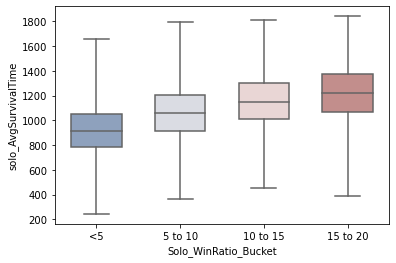

In [71]:
#using Seaborn to show the relation between Win ratio and time survived
sns.boxplot(x="Solo_WinRatio_Bucket", y="solo_AvgSurvivalTime", data=Solo_TimeandWin,
            whis=[0, 100], width=.6, palette="vlag")

# Duo win ratio and time survived

In [72]:
#Getting the required columns
Duo_TW = sf.filter(['duo_WinRatio','duo_AvgSurvivalTime','duo_KillDeathRatio'])

In [73]:
Duo_TW

,duo_WinRatio,duo_AvgSurvivalTime,duo_KillDeathRatio
0,33.33,1194.21,6.50
1,35.71,1020.42,4.56
2,35.29,1369.22,6.55
3,66.67,1398.79,8.00
4,25.71,1357.82,5.03
...,...,...,...
87893,7.14,869.71,1.00
87894,0.00,1256.53,1.55
87895,2.54,944.31,1.01
87896,17.74,993.52,3.88


In [74]:
#win ratio >20
Duo_TimeandWin = Duo_TW.loc[Duo_TW['duo_WinRatio'] < 20]

In [75]:
Duo_TimeandWin

,duo_WinRatio,duo_AvgSurvivalTime,duo_KillDeathRatio
5,14.67,713.74,2.94
7,18.52,1123.61,2.82
8,13.64,1090.14,3.16
9,17.65,1019.09,4.00
10,11.46,983.76,3.79
...,...,...,...
87893,7.14,869.71,1.00
87894,0.00,1256.53,1.55
87895,2.54,944.31,1.01
87896,17.74,993.52,3.88


In [76]:
#diving ages into buckets
Duo_TimeandWin['Duo_WinRatio_Bucket'] = pd.cut(x=Duo_TimeandWin['duo_WinRatio'],  bins=[0, 5.0, 10.0, 15.0, 20.0], labels=['<5','5 to 10','10 to 15','15 to 20'])

<ipython-input-76-5fd7cd84f9a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Duo_TimeandWin['Duo_WinRatio_Bucket'] = pd.cut(x=Duo_TimeandWin['duo_WinRatio'],  bins=[0, 5.0, 10.0, 15.0, 20.0], labels=['<5','5 to 10','10 to 15','15 to 20'])


In [77]:
Duo_TimeandWin

,duo_WinRatio,duo_AvgSurvivalTime,duo_KillDeathRatio,Duo_WinRatio_Bucket
5,14.67,713.74,2.94,10 to 15
7,18.52,1123.61,2.82,15 to 20
8,13.64,1090.14,3.16,10 to 15
9,17.65,1019.09,4.00,15 to 20
10,11.46,983.76,3.79,10 to 15
...,...,...,...,...
87893,7.14,869.71,1.00,5 to 10
87894,0.00,1256.53,1.55,NaN
87895,2.54,944.31,1.01,<5
87896,17.74,993.52,3.88,15 to 20


In [78]:
#drop NaN values
Duo_TimeandWin = Duo_TimeandWin.dropna()

In [79]:
Duo_TimeandWin

,duo_WinRatio,duo_AvgSurvivalTime,duo_KillDeathRatio,Duo_WinRatio_Bucket
5,14.67,713.74,2.94,10 to 15
7,18.52,1123.61,2.82,15 to 20
8,13.64,1090.14,3.16,10 to 15
9,17.65,1019.09,4.00,15 to 20
10,11.46,983.76,3.79,10 to 15
...,...,...,...,...
87892,1.61,814.37,0.92,<5
87893,7.14,869.71,1.00,5 to 10
87895,2.54,944.31,1.01,<5
87896,17.74,993.52,3.88,15 to 20


In [80]:
Duo_TimeandWin.dtypes

duo_WinRatio            float64
duo_AvgSurvivalTime     float64
duo_KillDeathRatio      float64
Duo_WinRatio_Bucket    category
dtype: object

<AxesSubplot:xlabel='Duo_WinRatio_Bucket', ylabel='duo_AvgSurvivalTime'>

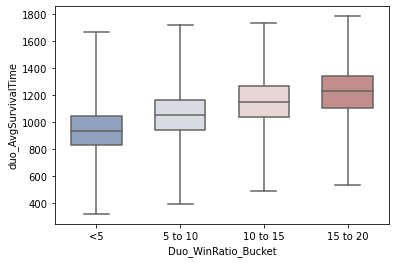

In [81]:
#using Seaborn to show the relation between Win ratio and time survived
sns.boxplot(x="Duo_WinRatio_Bucket", y="duo_AvgSurvivalTime", data=Duo_TimeandWin,
            whis=[0, 100], width=.6, palette="vlag")

# Squad Win ratio and Time survived

In [82]:
#getting the required columns
Squad_TW = sf.filter(['squad_WinRatio','squad_AvgSurvivalTime','squad_KillDeathRatio'])

In [83]:
Squad_TW

,squad_WinRatio,squad_AvgSurvivalTime,squad_KillDeathRatio
0,47.51,1449.03,5.45
1,46.81,1570.51,5.73
2,47.34,1223.28,6.08
3,42.16,1583.73,4.77
4,46.39,1608.96,5.70
...,...,...,...
87893,3.57,1074.56,0.94
87894,8.70,1050.24,1.42
87895,1.46,1121.51,0.90
87896,15.95,1312.41,2.88


In [84]:
#win Ratio < 20
Squad_TimeandWin = Squad_TW.loc[Squad_TW['squad_WinRatio'] < 20]

In [85]:
Squad_TimeandWin

,squad_WinRatio,squad_AvgSurvivalTime,squad_KillDeathRatio
11,18.50,1115.25,1.64
19,17.91,1153.04,2.39
20,18.56,1249.38,2.70
21,10.72,890.70,2.18
22,16.60,917.04,1.74
...,...,...,...
87893,3.57,1074.56,0.94
87894,8.70,1050.24,1.42
87895,1.46,1121.51,0.90
87896,15.95,1312.41,2.88


In [86]:
#diving the Win ratio into buckets
Squad_TimeandWin['Squad_WinRatio_Bucket'] = pd.cut(x=Squad_TimeandWin['squad_WinRatio'],  bins=[0, 5.0, 10.0, 15.0, 20.0], labels=['<5','5 to 10','10 to 15','15 to 20'])

<ipython-input-86-2fef1665c50e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Squad_TimeandWin['Squad_WinRatio_Bucket'] = pd.cut(x=Squad_TimeandWin['squad_WinRatio'],  bins=[0, 5.0, 10.0, 15.0, 20.0], labels=['<5','5 to 10','10 to 15','15 to 20'])


In [87]:
Squad_TimeandWin

,squad_WinRatio,squad_AvgSurvivalTime,squad_KillDeathRatio,Squad_WinRatio_Bucket
11,18.50,1115.25,1.64,15 to 20
19,17.91,1153.04,2.39,15 to 20
20,18.56,1249.38,2.70,15 to 20
21,10.72,890.70,2.18,10 to 15
22,16.60,917.04,1.74,15 to 20
...,...,...,...,...
87893,3.57,1074.56,0.94,<5
87894,8.70,1050.24,1.42,5 to 10
87895,1.46,1121.51,0.90,<5
87896,15.95,1312.41,2.88,15 to 20


In [88]:
#Droping NaN Values
Squad_TimeandWin = Squad_TimeandWin.dropna()

In [89]:
Squad_TimeandWin

,squad_WinRatio,squad_AvgSurvivalTime,squad_KillDeathRatio,Squad_WinRatio_Bucket
11,18.50,1115.25,1.64,15 to 20
19,17.91,1153.04,2.39,15 to 20
20,18.56,1249.38,2.70,15 to 20
21,10.72,890.70,2.18,10 to 15
22,16.60,917.04,1.74,15 to 20
...,...,...,...,...
87893,3.57,1074.56,0.94,<5
87894,8.70,1050.24,1.42,5 to 10
87895,1.46,1121.51,0.90,<5
87896,15.95,1312.41,2.88,15 to 20


In [90]:
Squad_TimeandWin.dtypes

squad_WinRatio            float64
squad_AvgSurvivalTime     float64
squad_KillDeathRatio      float64
Squad_WinRatio_Bucket    category
dtype: object

<AxesSubplot:xlabel='Squad_WinRatio_Bucket', ylabel='squad_AvgSurvivalTime'>

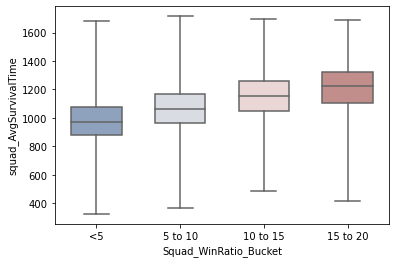

In [91]:
#using Seaborn to show the relation between Win ratio and time survived
sns.boxplot(x="Squad_WinRatio_Bucket", y="squad_AvgSurvivalTime", data=Squad_TimeandWin,
            whis=[0, 100], width=.6, palette="vlag")

# Comparing Win ratio with Rounds played in the game


# Solo Win Ratio vs Rounds Played

In [92]:
#getting the required columns
Solo_RP = sd.filter(['solo_WinRatio','solo_RoundsPlayed'])

In [93]:
Solo_RP

,solo_WinRatio,solo_RoundsPlayed
0,17.65,17
1,18.18,33
2,0.00,5
3,50.00,8
4,33.33,6
...,...,...
87893,0.00,62
87894,4.65,43
87895,0.00,16
87896,16.67,48


In [94]:
#diving the Rounds played into buckets
Solo_RP['Solo_RoundsPlayed_Bucket'] = pd.cut(x=Solo_RP['solo_RoundsPlayed'],  bins=[0, 100, 200, 300, 400], labels=['0-100','100-200','200-300','300-400'])

In [95]:
Solo_RP

,solo_WinRatio,solo_RoundsPlayed,Solo_RoundsPlayed_Bucket
0,17.65,17,0-100
1,18.18,33,0-100
2,0.00,5,0-100
3,50.00,8,0-100
4,33.33,6,0-100
...,...,...,...
87893,0.00,62,0-100
87894,4.65,43,0-100
87895,0.00,16,0-100
87896,16.67,48,0-100


<AxesSubplot:xlabel='Solo_RoundsPlayed_Bucket', ylabel='solo_WinRatio'>

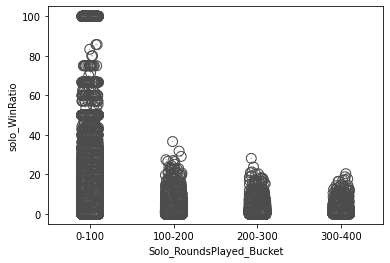

In [96]:
#using seaborn to show the relation between Rounds Played and Win Ratio
sns.stripplot(x="Solo_RoundsPlayed_Bucket", y="solo_WinRatio", data=Solo_RP,
              size=1, color=".5", linewidth=10)

# Duo Win Ratio vs Rounds Played

In [97]:
#getting the required columns
Duo_RP = sd.filter(['duo_WinRatio','duo_RoundsPlayed'])

In [98]:
Duo_RP

,duo_WinRatio,duo_RoundsPlayed
0,33.33,15
1,35.71,14
2,35.29,17
3,66.67,3
4,25.71,105
...,...,...
87893,7.14,28
87894,0.00,22
87895,2.54,118
87896,17.74,248


In [99]:
#Diving the rounds played into bucket
Duo_RP['Duo_RoundsPlayed_Bucket'] = pd.cut(x=Duo_RP['duo_RoundsPlayed'],  bins=[0, 100, 200, 300, 400], labels=['0-100','100-200','200-300','300-400'])

In [100]:
Duo_RP

,duo_WinRatio,duo_RoundsPlayed,Duo_RoundsPlayed_Bucket
0,33.33,15,0-100
1,35.71,14,0-100
2,35.29,17,0-100
3,66.67,3,0-100
4,25.71,105,100-200
...,...,...,...
87893,7.14,28,0-100
87894,0.00,22,0-100
87895,2.54,118,100-200
87896,17.74,248,200-300


<AxesSubplot:xlabel='Duo_RoundsPlayed_Bucket', ylabel='duo_WinRatio'>

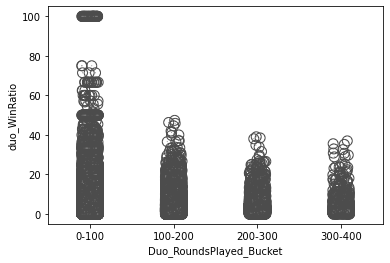

In [101]:
#using seaborn to show the relation between Rounds Played and Win Ratio
sns.stripplot(x="Duo_RoundsPlayed_Bucket", y="duo_WinRatio", data=Duo_RP,
              size=1, color=".5", linewidth=10)

# Squad Win Ratio vs Rounds Played

In [102]:
#getting the required columns
Squad_RP = sd.filter(['squad_WinRatio','squad_RoundsPlayed'])

In [103]:
Squad_RP

,squad_WinRatio,squad_RoundsPlayed
0,47.51,642
1,46.81,722
2,47.34,733
3,42.16,491
4,46.39,416
...,...,...
87893,3.57,56
87894,8.70,92
87895,1.46,137
87896,15.95,163


In [104]:
#diving the rounds played into buckets
Squad_RP['Squad_RoundsPlayed_Bucket'] = pd.cut(x=Squad_RP['squad_RoundsPlayed'],  bins=[0, 250, 500, 750, 1000], labels=['0-250','250-500','500-750','750-1000'])

In [105]:
Squad_RP

,squad_WinRatio,squad_RoundsPlayed,Squad_RoundsPlayed_Bucket
0,47.51,642,500-750
1,46.81,722,500-750
2,47.34,733,500-750
3,42.16,491,250-500
4,46.39,416,250-500
...,...,...,...
87893,3.57,56,0-250
87894,8.70,92,0-250
87895,1.46,137,0-250
87896,15.95,163,0-250


<AxesSubplot:xlabel='Squad_RoundsPlayed_Bucket', ylabel='squad_WinRatio'>

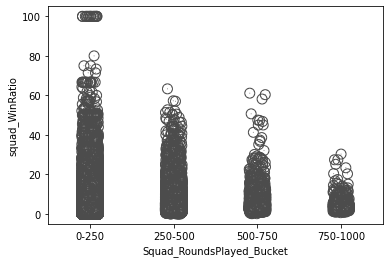

In [106]:
#using seaborn to show the relation between Rounds Played and Win Ratio
sns.stripplot(x="Squad_RoundsPlayed_Bucket", y="squad_WinRatio", data=Squad_RP,
              size=1, color=".5", linewidth=10)